<a href="https://colab.research.google.com/github/HamedGholampour/Stock_Predict_With_LSTM/blob/main/Stock_Market%20_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capital Market Forecasting using LSTM Algorithm

 
Author: Hamed Gholampour

Description:
This code implements a capital market forecasting algorithm with LSTM Model. It uses an advanced algorithm to predict market trends and make forecasts based on historical data.

The code follows a modular approach and is designed to be easily understandable and maintainable. It incorporates various data preprocessing techniques, feature engineering, and machine learning models to generate accurate market forecasts.

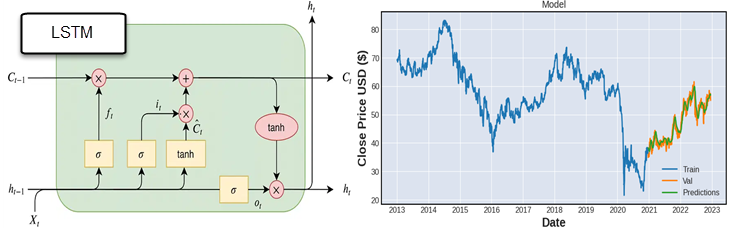


In [38]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import mplfinance as mplf
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout
from keras import regularizers

In [40]:
data = pdr.get_data_yahoo('SHEL', start='2013-01-01', end='2022-12-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  69.470001  69.610001  68.639999  69.230003  39.446976  2999814
2013-01-03  68.940002  69.379997  68.919998  69.000000  39.315918  1845684
2013-01-04  68.860001  69.489998  68.839996  69.379997  39.532440  1939538
2013-01-07  68.529999  69.089996  68.516197  68.989998  39.310211  2014269
2013-01-08  68.760002  68.839996  68.370003  68.839996  39.224751  2265710
...               ...        ...        ...        ...        ...      ...
2022-12-12  56.060001  56.564999  55.880001  56.360001  55.312969  4491861
2022-12-13  57.369999  57.744999  57.150002  57.380001  56.314022  5091499
2022-12-14  57.380001  57.480000  56.540001  56.759998  55.705536  4325588
2022-12-15  56.759998  56.900002  55.779999  56.150002  55.106873  6087661
2022-12-16  54.939999  55.25999

In [41]:
df=data
df.shape

(2509, 6)

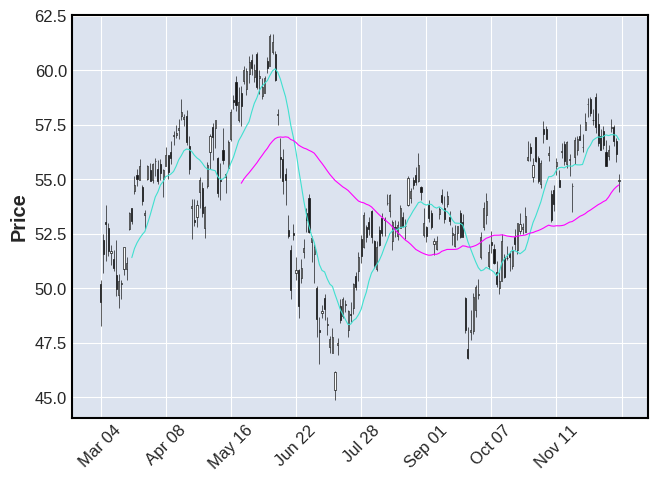

In [42]:
# Candlestick chart of the last 200 days

mplf.plot(df[-200:], type='candle', mav=(13, 55))
plt.show()

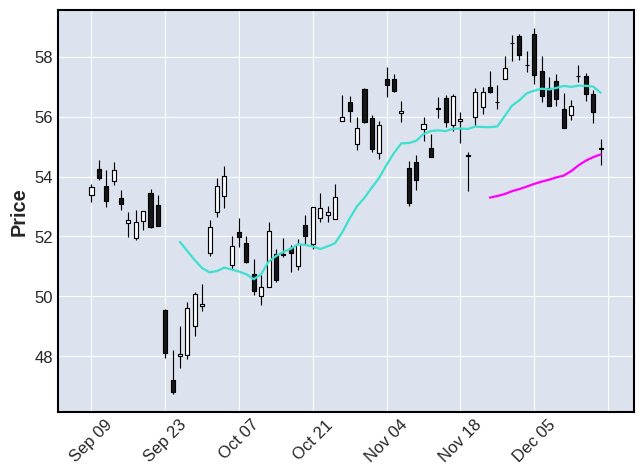

In [43]:
# Candlestick chart of the last 70 days

mplf.plot(df[-70:], type='candle', mav=(13, 55))
plt.show()

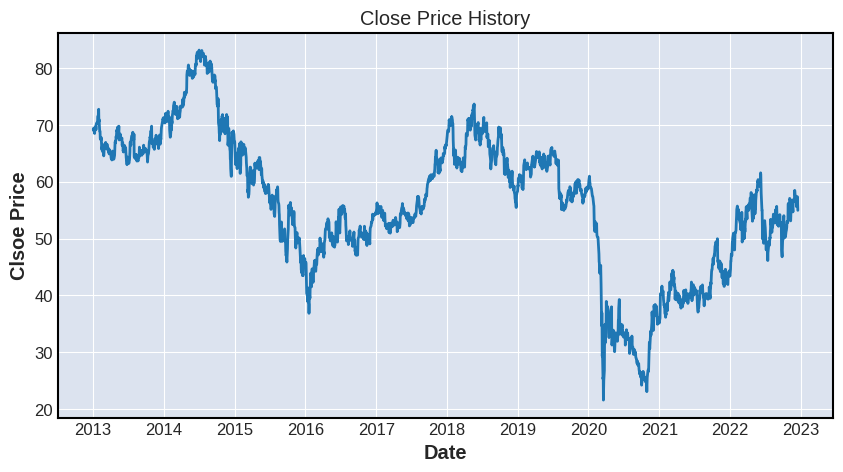

In [44]:
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Clsoe Price')
plt.show()

# Preprocessing Data

In [45]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])

# convert to numpy
dataset=data.values
print(dataset.shape)

# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

(2509, 1)


2008

In [46]:
#scale the data in range 0 and 1
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)
print(scaled_data.shape)


(2509, 1)


In [47]:
scaled_data

array([[0.77414636],
       [0.77040647],
       [0.77658528],
       ...,
       [0.57138206],
       [0.56146341],
       [0.54211378]])

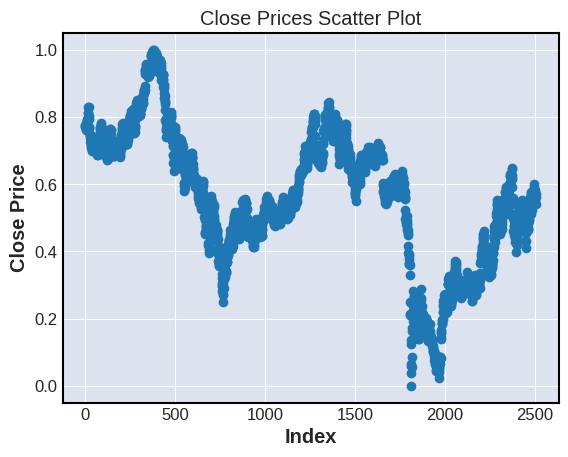

In [48]:
# Create a scatter plot of the close prices
plt.scatter(range(len(dataset)), scaled_data)
plt.title('Close Prices Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.show()

In [49]:
# creat scaled data for training
train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]


# Getting data for the last 60 days
#x_train= Data between 0 ta 59
#y_train= Data on the 60th day
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [50]:
#convert  the x_train , y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
print('x_train=',x_train.shape)
print('y_train=',y_train.shape)

x_train= (1948, 60)
y_train= (1948,)


In [51]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1948, 60, 1)

This code sets up a deep learning model with multiple LSTM layers, dropout layers for regularization, and dense layers for learning complex patterns.

In [52]:
#Build the New LSTM model with 5 layer
model=Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Dropout(0.2))

model.add(Dense(1))

In [53]:
# Compile the model with adam optimizer
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001, clipvalue=1.0)  # Adjust learning rate and clipvalue as needed
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [54]:
model.fit(x_train, y_train, batch_size=32, epochs=10)  # Adjust batch size and epochs as needed

Epoch 1/10
61/61 [==============================] - 25s 297ms/step - loss: 0.0333
Epoch 2/10
61/61 [==============================] - 17s 280ms/step - loss: 0.0160
Epoch 3/10
61/61 [==============================] - 10s 165ms/step - loss: 0.0136
Epoch 4/10
61/61 [==============================] - 9s 146ms/step - loss: 0.0109
Epoch 5/10
61/61 [==============================] - 10s 165ms/step - loss: 0.0104
Epoch 6/10
61/61 [==============================] - 10s 163ms/step - loss: 0.0081
Epoch 7/10
61/61 [==============================] - 10s 166ms/step - loss: 0.0077
Epoch 8/10
61/61 [==============================] - 9s 144ms/step - loss: 0.0069
Epoch 9/10
61/61 [==============================] - 10s 166ms/step - loss: 0.0068
Epoch 10/10
61/61 [==============================] - 10s 166ms/step - loss: 0.0065


# Data testing and validation

In [55]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:] 
print(len(test_data))
x_test=[] 
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

561
561


In [56]:
#convert x_test to numpy arrays

x_test=np.array(x_test)

In [57]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [58]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions) 

16/16 [==============================] - 3s 86ms/step


In [59]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.6025085220793764

<ipython-input-60-8f1f9b857d9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


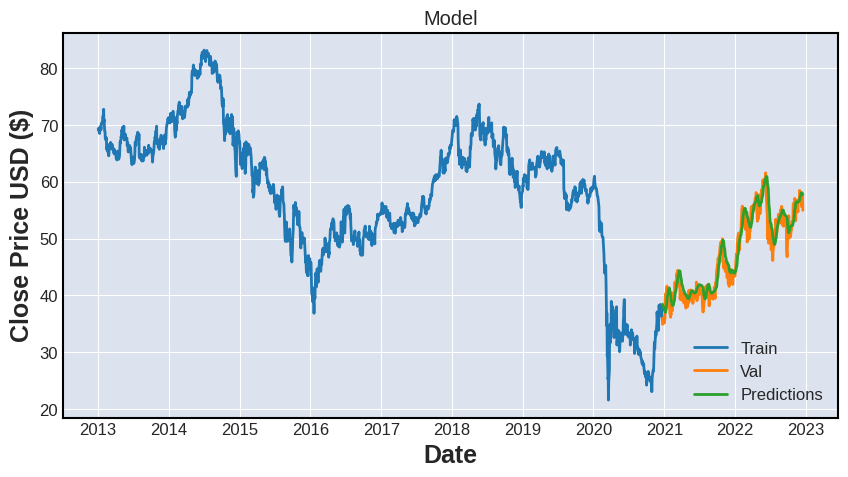

In [60]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [61]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-12-22,34.939999,38.478779
2020-12-23,35.939999,38.387936
2020-12-24,35.830002,38.230606
2020-12-28,35.900002,38.031773
2020-12-29,36.139999,37.816074
...,...,...
2022-12-12,56.360001,58.039520
2022-12-13,57.380001,57.958447
2022-12-14,56.759998,57.871998


In [62]:
She1 = pdr.get_data_yahoo('SHEL', start='2013-01-01', end='2022-12-17')


# Create a new data frame
new_df=df.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array

last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 32ms/step
[[57.590046]]


In [63]:
she2= pdr.get_data_yahoo('SHEL', start='2022-12-17', end='2022-12-28')
print(she2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-12-19    55.520000
2022-12-20    56.130001
2022-12-21    57.599998
2022-12-22    56.740002
2022-12-23    57.779999
2022-12-27    57.869999
Name: Close, dtype: float64


# Moving Average & Exponential Moving Average(EMA)

In [64]:
# Create a function for calculation Moving Average(MA)
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

In [65]:
# Create a function for calculation Exponential Moving Average(EMA)
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()

In [66]:
# Create two new columns for storing the new MA periods
df['MA10'] = MA(df, 10)  # Calculating 10-day MA
df['MA100'] = MA(df, 100)  # Calculating 100-day MA

# Create two new columns for storing the new EMA periods
df['EMA10'] = EMA(df, 10)  # Calculating 10-day EMA
df['EMA100'] = EMA(df, 100)  # Calculating 100-day EMA

In [67]:
# Get the buy and sell signals based on the new MA periods
df['Signal2'] = np.where(df['MA10'] > df['MA100'], 1, 0)
df['Position2'] = df['Signal2'].diff()

df['Buy2'] = np.where(df['Position2'] == 1, df['Close'], np.nan)
df['Sell2'] = np.where(df['Position2'] == -1, df['Close'], np.nan)


In [68]:
# Get the buy and sell signals based on the new MA periods
df['Signal2'] = np.where(df['EMA10'] > df['EMA100'], 1, 0)
df['Position2'] = df['Signal2'].diff()

df['Buy2'] = np.where(df['Position2'] == 1, df['Close'], np.nan)
df['Sell2'] = np.where(df['Position2'] == -1, df['Close'], np.nan)

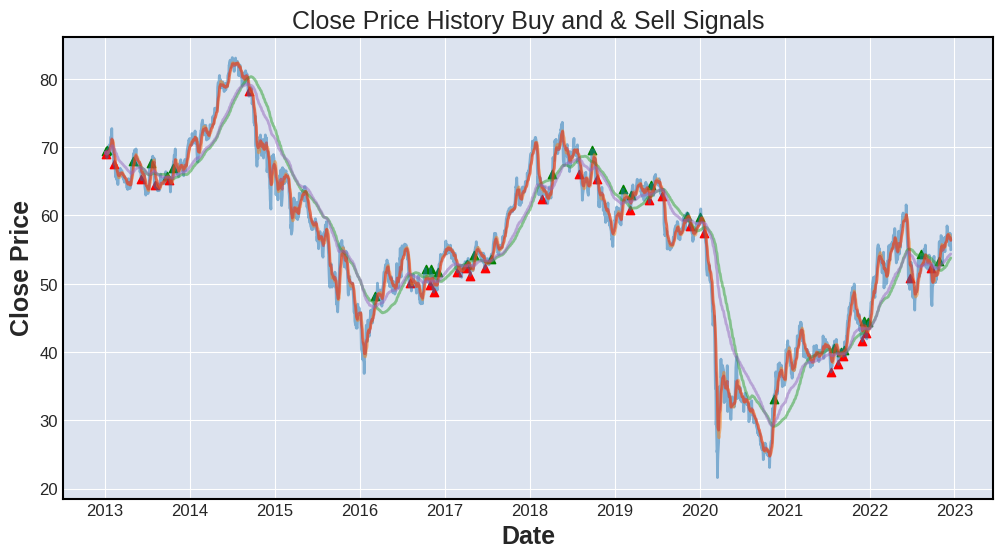

In [69]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(figsize=(12,6))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
plt.plot(df['MA10'], alpha=0.5 , label='MA10')
plt.plot(df['MA100'], alpha=0.5 , label='MA100')
plt.plot(df['EMA10'], alpha=0.5 , label='EMA10')
plt.plot(df['EMA100'], alpha=0.5 , label='EMA100')
plt.scatter(df.index,df['Buy2'], alpha=1, label='Buy Signal', marker='^',color='green')
plt.scatter(df.index,df['Sell2'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()